<a href="https://colab.research.google.com/github/CyperVoid/all-simplified-ml-labs/blob/main/exam_friendly_ml10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix:
 [[175  37]
 [ 13 344]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       212
           1       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.92      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



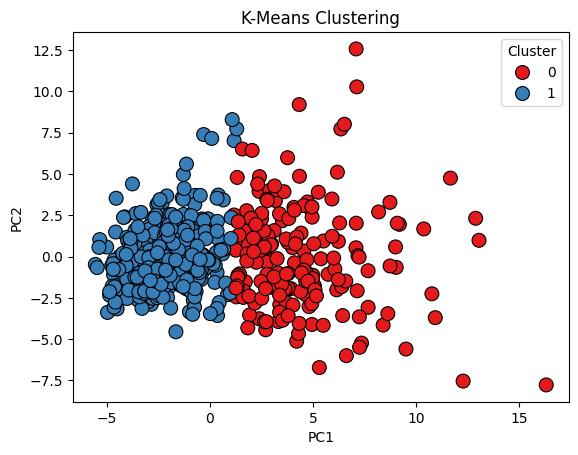

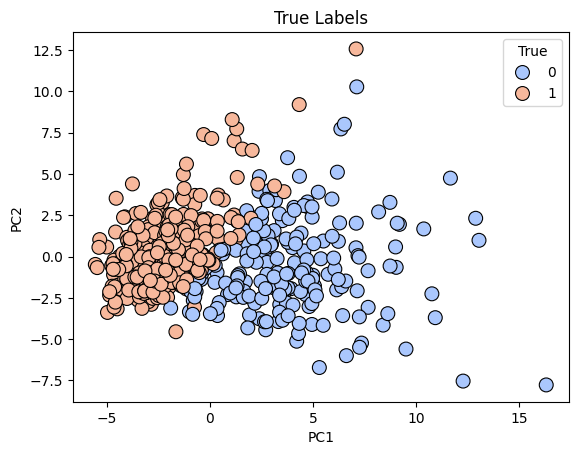

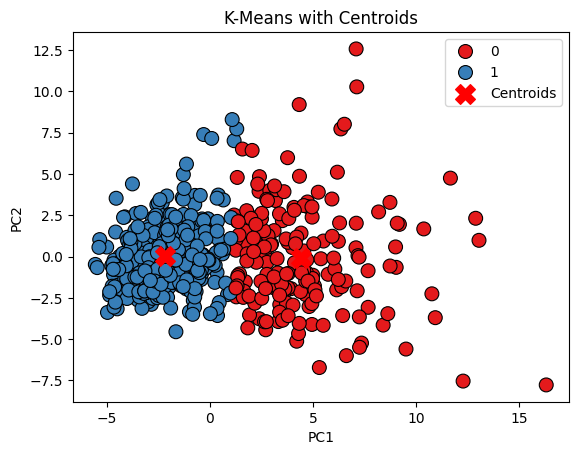

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

# Load and scale data
X, y = load_breast_cancer(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)

# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y, y_kmeans))
print("\nClassification Report:\n", classification_report(y, y_kmeans))

# PCA for 2D visualization
X_pca = PCA(n_components=2).fit_transform(X_scaled)
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'], df['True'] = y_kmeans, y

# Plot - Clustered
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, edgecolor='k')
plt.title('K-Means Clustering'); plt.show()

# Plot - True Labels
sns.scatterplot(data=df, x='PC1', y='PC2', hue='True', palette='coolwarm', s=100, edgecolor='k')
plt.title('True Labels'); plt.show()

# Plot - Clusters with Centroids
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, edgecolor='k')
centers = PCA(n_components=2).fit(X_scaled).transform(kmeans.cluster_centers_)
plt.scatter(*centers.T, s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means with Centroids'); plt.legend(); plt.show()
